# SBERT Docs Based Code
Next, I took a look at the [SBERT documentation](https://sbert.net/). Note that a lot of all code below is copied from there.

In [20]:
# This is their initial example to show how easy SBERT is
# DONE: To know which model to use, take a look at those descriptions: https://www.sbert.net/docs/pretrained_models.html#sentence-embedding-models
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

# Comparing results

In [21]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

#Sentences are encoded by calling model.encode()
emb1 = model.encode("This is a red cat with a hat.")
emb2 = model.encode("Have you seen my red cat?")
emb3 = model.encode("I am a student at the university of Antwerp")
emb4 = model.encode("Information retrieval is given at our university")
emb5 = model.encode("Studying at the university of Antwerp is great")
cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)
print(f"Cosine-Similarity not similar sentence: {util.cos_sim(emb1, emb3)}")
print(f"Cos-Sim of own similar sentences: {util.cos_sim(emb3, emb4)}")
print(f"Cos-Sim of own more similar sentences: {util.cos_sim(emb3, emb5)}")

Cosine-Similarity: tensor([[0.6153]])
Cosine-Similarity not similar sentence: tensor([[-0.0356]])
Cos-Sim of own similar sentences: tensor([[0.3480]])
Cos-Sim of own more similar sentences: tensor([[0.8072]])


In [22]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.'
          ]

#Encode all sentences
embeddings = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))

# TODO: For training own embeddings, I have to take a look here: https://sbert.net/docs/training/overview.html

Top-5 most similar pairs:
A man is eating food. 	 A man is eating a piece of bread. 	 0.7553
A man is riding a horse. 	 A man is riding a white horse on an enclosed ground. 	 0.7369
A monkey is playing drums. 	 Someone in a gorilla costume is playing a set of drums. 	 0.6433
A woman is playing violin. 	 Someone in a gorilla costume is playing a set of drums. 	 0.2564
A man is eating food. 	 A man is riding a horse. 	 0.2474


# Pretrained models
Currently on [this page](https://sbert.net/docs/pretrained_models.html) of the tutorial.

By reading the description of the models, those where the one that seemed interesting to me:
- multi-qa-mpnet-base-dot-v1:   This model was tuned for semantic search: Given a query/question, if can find relevant passages. It was trained on a large and diverse set of (question, answer) pairs.
- multi-qa-distilbert-cos-v1: 	This model was tuned for semantic search: Given a query/question, if can find relevant passages. It was trained on a large and diverse set of (question, answer) pairs. (twice as fast as the one above)
- multi-qa-MiniLM-L6-cos-v1: 	This model was tuned for semantic search: Given a query/question, if can find relevant passages. It was trained on a large and diverse set of (question, answer) pairs. (six times as fast as the first one)
- all-mpnet-base-v2: All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
- all-MiniLM-L12-v2: All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs. (the faster version)

## Semantic search
There are also more models trained specifically on semantic search, which is what we need.

In [23]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

query_embedding = model.encode('How big is London')
passage_embedding = model.encode(['London has 9,787,426 inhabitants at the 2011 census',
                                  'London is known for its finacial district',
                                  'I like trains',
                                  'London is very large',
                                  'London is bigger than Middelheim'])

print("Similarity:", util.dot_score(query_embedding, passage_embedding))

Similarity: tensor([[0.5472, 0.6330, 0.0656, 0.9003, 0.6642]])


### Multi-QA Models
Those where the first three mentioned from my list above and have been trained on 215M question-answer pairs from various sources and domains, including StackExchange, Yahoo Answers, Google & Bing search queries and many more. These model perform well across many search tasks and domains accoording to the site, so I definetly have to try them.

#### Bing dataset
- msmarco-bert-base-dot-v5

Since all our documents are in English, we don't need multi-lingual models.

## Pretrained cross-encoders

In [24]:
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/ms-marco-TinyBERT-L-2-v2', max_length=512)
scores = model.predict([('Query1', 'Paragraph1'), ('Query1', 'Paragraph2')])

#For Example
scores = model.predict([('How many people live in Berlin?', 'Berlin had a population of 3,520,031 registered inhabitants in an area of 891.82 square kilometers.'),
                        ('How many people live in Berlin?', 'Berlin is well known for its museums.')])
print(scores)
# TODO: Take a better look at Retrieve & Re-Rank: https://sbert.net/examples/applications/retrieve_rerank/README.html

[ 7.152369  -6.2870445]


In [25]:
# This is not useful for the assignment, but just seemed cool to me (also similar to the tutorials mentioned in the assignment)
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/nli-distilroberta-base')
scores = model.predict([('A man is eating pizza', 'A man eats something'), ('A black race car starts up in front of a crowd of people.', 'A man is driving down a lonely road.')])

# Convert scores to labels
label_mapping = ['contradiction', 'entailment', 'neutral']
labels = [label_mapping[score_max] for score_max in scores.argmax(axis=1)]
print(labels)

['entailment', 'contradiction']


## References
Take a look [here](https://sbert.net/docs/publications.html) for the references, I think the only required citations I used are the repo and MSMacro.

# Computing embeddings
I'm currently on [this](https://sbert.net/examples/applications/computing-embeddings/README.html) tutorial page.
## Input sequence length
As mentioned in one of the earlier tutorial, the longer texts must be truncated.
>  Transformer models like BERT / RoBERTa / DistilBERT etc. the runtime and the memory requirement grows quadratic with the input length. This limits transformers to inputs of certain lengths. A common value for BERT & Co. are 512 word pieces, which corresponde to about 300-400 words (for English). Longer texts than this are truncated to the first x word pieces.

By default, there is a limit of 128 word pieces. Let's take a look at our length distribution graph mentioned in the previous tutorial:

In [26]:
# See how long the text information is
import pandas as pd
df = pd.read_csv("./data/training_data.csv")
# Note: Loading the dataframe is put in a different cell to prevent longer loads

avg. doc_len: 1812.0840857142857
max_seq_len: 5148


c:\users\arnod\pycharmprojects\neural-retrieval-bert\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


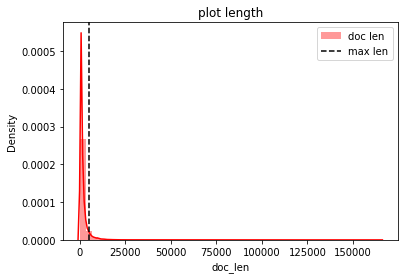

Training data number of rows: 140000


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df['doc_len'] = df['doc_text'].apply(lambda words: len(str(words).split()))
print(f"avg. doc_len: {df['doc_len'].mean()}")
max_seq_len = np.round(df['doc_len'].mean() + df['doc_len'].std()).astype(int)
print(f"max_seq_len: {max_seq_len}")
sns.distplot(df['doc_len'], hist=True, kde=True, color='r', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('plot length'); plt.legend()
plt.show()

# Get an idea of the number of entries:
index = df.index
number_of_rows = len(index)
print(f"Training data number of rows: {number_of_rows}")

As you can see, the average text length is 1812 words, by adding the standard deviation to this, we get a max_sequence length of 5148 (based on what the previous tutorial described as max sequence length), which is quite long for the models. We can however change the max length for a model, but this will lead to a lot longer times as described above, so this will be a challenge we'll have to face later on. Currently, we'll just assume the first 256 words of a document will contain enough information to determine whether it's relevant for a query.
> Note: You cannot increase the length higher than what is maximally supported by the respective transformer model. Also note that if a model was trained on short texts, the representations for long texts might not be that good

In [28]:
# Example of how to change the max sequence length
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

print("Max Sequence Length:", model.max_seq_length)

#Change the length to 200
model.max_seq_length = 5148

print("Max Sequence Length:", model.max_seq_length)

Max Sequence Length: 256
Max Sequence Length: 5148


## Storing & Loading embeddings
When we have made embeddings for all sentences, we can store and load them as follows:

In [29]:
from sentence_transformers import SentenceTransformer
import pickle

model = SentenceTransformer('all-MiniLM-L6-v2')
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']


embeddings = model.encode(sentences)

#Store sentences & embeddings on disc
with open('embeddings.pkl', "wb") as fOut:
    pickle.dump({'sentences': sentences, 'embeddings': embeddings}, fOut, protocol=pickle.HIGHEST_PROTOCOL)

#Load sentences & embeddings from disc
with open('embeddings.pkl', "rb") as fIn:
    stored_data = pickle.load(fIn)
    stored_sentences = stored_data['sentences']
    stored_embeddings = stored_data['embeddings']

# Semantic search
I'm currently at [this](https://sbert.net/examples/applications/semantic-search/README.html) page of the tutorial.
As mentioned earlier, it is clear that we're having a case of Assymetric Search:
> For asymmetric semantic search, you usually have a short query (like a question or some keywords) and you want to find a longer paragraph answering the query. An example would be a query like “What is Python” and you wand to find the paragraph “Python is an interpreted, high-level and general-purpose programming language. Python’s design philosophy …”. For asymmetric tasks, flipping the query and the entries in your corpus usually does not make sense.

The [MsMacro models](https://www.sbert.net/docs/pretrained-models/msmarco-v3.html) should be suitable for asymetric search.

Because we're working with longer passages, we'll follow this note and work with the models that are tuned to work with the dot product.
> Models tuned for cosine-similarity will prefer the retrieval of shorter passages, while models for dot-product will prefer the retrieval of longer passages. Depending on your task, you might prefer the one or the other type of model.

I'll use `msmarco-distilbert-base-tas-b` as model, since this seems the best option for our scenario accoording to the tutorial.

Both models are tuned to work with cosine-similarity

We've already seen that our training data contains 140.000 rows. Let's take a look at how many documents there are.

In [ ]:
!wc -l data/all_docs.csv

> 126204 data/all_docs.csv

This is a small corpora (less than 1 million entries), so we can probably compute the dot product for all documents.

Here's an example for semantic search from the tutorial:

In [30]:
"""
This is a simple application for sentence embeddings: semantic search

We have a corpus with various sentences. Then, for a given query sentence,
we want to find the most similar sentence in this corpus.

This script outputs for various queries the top 5 most similar sentences in the corpus.
"""
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'A cheetah is running behind its prey.'
          ]
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# Query sentences:
queries = ['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(corpus[idx], "(Score: {:.4f})".format(score))

    """
    # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    hits = hits[0]      #Get the hits for the first query
    for hit in hits:
        print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    """





Query: A man is eating pasta.

Top 5 most similar sentences in corpus:
A man is eating food. (Score: 0.7035)
A man is eating a piece of bread. (Score: 0.5272)
A man is riding a horse. (Score: 0.1889)
A man is riding a white horse on an enclosed ground. (Score: 0.1047)
A cheetah is running behind its prey. (Score: 0.0980)




Query: Someone in a gorilla costume is playing a set of drums.

Top 5 most similar sentences in corpus:
A monkey is playing drums. (Score: 0.6433)
A woman is playing violin. (Score: 0.2564)
A man is riding a horse. (Score: 0.1389)
A man is riding a white horse on an enclosed ground. (Score: 0.1191)
A cheetah is running behind its prey. (Score: 0.1080)




Query: A cheetah chases prey on across a field.

Top 5 most similar sentences in corpus:
A cheetah is running behind its prey. (Score: 0.8253)
A man is eating food. (Score: 0.1399)
A monkey is playing drums. (Score: 0.1292)
A man is riding a white horse on an enclosed ground. (Score: 0.1097)
A man is riding a 

SBERT also has a `sentence_transformers.util.semantic_search` function built in, which might be a better choice than performing the search manually like the code above.
More info can be found [here](https://sbert.net/examples/applications/semantic-search/README.html#sentence_transformers.util.semantic_search).

An example of Aproximate Nearest Neighbours (ANN) in case finding the exact top-k is too large, can be found [here](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/semantic-search/semantic_search_quora_hnswlib.py).

An example of a retrieve-rerank on the wikipedia paragraphs can be found [here](https://sbert.net/examples/applications/semantic-search/README.html#question-answer-retrieval).

## Bi-encoder
This maps the query into the same vector space as your documents and loos at the nearest documents.

## Cross-encoder
Can be used for reranking the (e.g. 100) potentially irrelevant results from the Bi-encoder. This outputs a score between 0 and 1, representing how relevant the document is for the given query.
TODO: Continue from here: https://sbert.net/examples/applications/retrieve_rerank/README.html#example-scripts

### Example

In [31]:
from sentence_transformers.cross_encoder import CrossEncoder
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')
model.predict([["hey I'm Arno", "I study computer science"],
                        ["hey I'm Arno", "some days just make you smile"],
               ["I like cats", "cats are nice"]])

array([-11.282532 , -11.377878 ,   2.7110152], dtype=float32)

# Wikipedia-example
This is code based on [the wikipedia example](https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/retrieve_rerank/retrieve_rerank_simple_wikipedia.ipynb) mentioned in the [tutorial](https://sbert.net/examples/applications/retrieve_rerank/README.html#example-scripts), modified to work on our documents dataset.

## Index Bi-Encoder
Indexing the Bi-Encoder for semantic search.

In [33]:
from sentence_transformers import SentenceTransformer, CrossEncoder, util
import os
import torch
import pandas as pd

if not torch.cuda.is_available():
    print("Warning: No GPU found. Please add GPU to your notebook")


#We use the Bi-Encoder to encode all passages, so that we can use it with sematic search
bi_encoder = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
bi_encoder.max_seq_length = 256     #Truncate long passages to 256 tokens
top_k = 32                          #Number of passages we want to retrieve with the bi-encoder

#The bi-encoder will retrieve 100 documents. We use a cross-encoder, to re-rank the results list to improve the quality
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# As dataset, we use Simple English Wikipedia. Compared to the full English wikipedia, it has only
# about 170k articles. We split these articles into paragraphs and encode them with the bi-encoder

#wikipedia_filepath = 'simplewiki-2020-11-01.jsonl.gz'
# Nope, we're using our own dataset provided with the assignment
all_docs_filepath = "data/all_docs.csv"

if not os.path.exists(all_docs_filepath):
    print("Noooooooooooooooooooooooooo, the file doesn't exists :(")

df = pd.read_csv("./data/training_data.csv")

passages = []
for index, row in df.iterrows():
    data = row['doc_text']
    first_words = " ".join(str(data).split()[:500]) # Only take the first 500 words
    passages.append(first_words)

print("Passages:", len(passages))

# We encode all passages into our vector space. This takes about 5 minutes (depends on your GPU speed)
corpus_embeddings = bi_encoder.encode(passages, convert_to_tensor=True, show_progress_bar=True)

MemoryError: 

## Index Lexical Search
We also compare the results to Lexical search, to see the differences.

In [ ]:
# We also compare the results to lexical search (keyword search). Here, we use
# the BM25 algorithm which is implemented in the rank_bm25 package.

from rank_bm25 import BM25Okapi
from sklearn.feature_extraction import _stop_words
import string
from tqdm.autonotebook import tqdm
import numpy as np


# We lower case our text and remove stop-words from indexing
def bm25_tokenizer(text):
    tokenized_doc = []
    for token in text.lower().split():
        token = token.strip(string.punctuation)

        if len(token) > 0 and token not in _stop_words.ENGLISH_STOP_WORDS:
            tokenized_doc.append(token)
    return tokenized_doc


tokenized_corpus = []
for passage in tqdm(passages):
    tokenized_corpus.append(bm25_tokenizer(passage))

bm25 = BM25Okapi(tokenized_corpus)

## Search
The search function itself

In [ ]:
# This function will search all documents for passages that
# answer the query
def search(query):
    print("Input question:", query)

    ##### BM25 search (lexical search) #####
    bm25_scores = bm25.get_scores(bm25_tokenizer(query))
    top_n = np.argpartition(bm25_scores, -5)[-5:]
    bm25_hits = [{'corpus_id': idx, 'score': bm25_scores[idx]} for idx in top_n]
    bm25_hits = sorted(bm25_hits, key=lambda x: x['score'], reverse=True)

    print("Top-3 lexical search (BM25) hits")
    for hit in bm25_hits[0:3]:
        print("\t{:.3f}\t{}".format(hit['score'], passages[hit['corpus_id']].replace("\n", " ")))

    ##### Sematic Search #####
    # Encode the query using the bi-encoder and find potentially relevant passages
    question_embedding = bi_encoder.encode(query, convert_to_tensor=True)
    question_embedding = question_embedding.cuda()
    hits = util.semantic_search(question_embedding, corpus_embeddings, top_k=top_k)
    hits = hits[0]  # Get the hits for the first query

    ##### Re-Ranking #####
    # Now, score all retrieved passages with the cross_encoder
    cross_inp = [[query, passages[hit['corpus_id']]] for hit in hits]
    cross_scores = cross_encoder.predict(cross_inp)

    # Sort results by the cross-encoder scores
    for idx in range(len(cross_scores)):
        hits[idx]['cross-score'] = cross_scores[idx]

    # Output of top-5 hits from bi-encoder
    print("\n-------------------------\n")
    print("Top-3 Bi-Encoder Retrieval hits")
    hits = sorted(hits, key=lambda x: x['score'], reverse=True)
    for hit in hits[0:3]:
        print("\t{:.3f}\t{}".format(hit['score'], passages[hit['corpus_id']].replace("\n", " ")))

    # Output of top-5 hits from re-ranker
    print("\n-------------------------\n")
    print("Top-3 Cross-Encoder Re-ranker hits")
    hits = sorted(hits, key=lambda x: x['cross-score'], reverse=True)
    for hit in hits[0:3]:
        print("\t{:.3f}\t{}".format(hit['cross-score'], passages[hit['corpus_id']].replace("\n", " ")))

In [ ]:
search("sustainable agriculture characteristics")

## Pre-trained Bi-Encoders (Retrieval)

In [34]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

docs = ["My first paragraph. That contains information", "Python is a programming language."]
document_embeddings = model.encode(docs)

query = "What is Python?"
query_embedding = model.encode(query)

# Training
Great, so far we've only worked with pretrained models, but since we have labeled data, we can fine tune the model with this. I'm continuing the documentation from [here](https://sbert.net/docs/training/overview.html).

BERT is used to produce contextualized word embeddings for the input tokens in the text. This is a set of 768 dimensional output vectors. The pooling layer then uses those embeddings to create a vector representing the document. Different options for pooling are possible, for example just taking the mean of all vectors.

A SentenceTransformer is the combination of BERT with such a pooling layer, that converts some input sentence(s) into a vector.

## Creating a network from scratch
The previously used models already combined an embedding model with a pooling layer. You can also define them manually.

In [35]:
from sentence_transformers import SentenceTransformer, models

word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=256) # Texts longer than this will be truncated
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Training data
SBERT has an InputExample class to store training examples. It accepts pairs of (query, anwer) strings and a label representing semantic similarity.

In [36]:
from sentence_transformers import SentenceTransformer, InputExample
from torch.utils.data import DataLoader

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
train_examples = [InputExample(texts=['My first sentence', 'My second sentence'], label=0.8),
   InputExample(texts=['Another pair', 'Unrelated sentence'], label=0.3)]
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16) # Shuffles the data and creates batches of certain sizes

In [37]:
# Load our own train examples, we can train our data with dev_data.csv
from sentence_transformers import InputExample
import pandas as pd
df = pd.read_csv("./data/training_data.csv")

train_examples = []
for index, row in df.iterrows():
    query = str(row['Query'])
    doc_text = str(row['doc_text'])
    label = float(row['label'])
    #first_words = " ".join(str(data).split()[:500]) # Skip this step, since the embedding model already truncates the data when required
    train_examples.append(InputExample(texts=[query, doc_text], label=label))

In [38]:
from sentence_transformers import SentenceTransformer, InputExample
from torch.utils.data import DataLoader

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)

## Loss Functiones
As mentioned in the tutorial, there is no "one size fits all" loss functions, so we'll have to try a bit and see what works on our data.

### CosineSimilarityLoss example

In [39]:
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader

#Define the model. Either from scratch of by loading a pre-trained model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

#Define your train examples. You need more than just two examples...
train_examples = [InputExample(texts=['My first sentence', 'My second sentence'], label=0.8),
    InputExample(texts=['Another pair', 'Unrelated sentence'], label=0.3)]

#Define your train dataset, the dataloader and the train loss
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model)

#Tune the model
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=1, warmup_steps=100)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1 [00:00<?, ?it/s]

## Evaluators

In [40]:
from sentence_transformers import evaluation
sentences1 = ['This list contains the first column', 'With your sentences', 'You want your model to evaluate on']
sentences2 = ['Sentences contains the other column', 'The evaluator matches sentences1[i] with sentences2[i]', 'Compute the cosine similarity and compares it to scores[i]']
scores = [0.3, 0.6, 0.2]

evaluator = evaluation.EmbeddingSimilarityEvaluator(sentences1, sentences2, scores)

# ... Your other code to load training data
train_examples = [InputExample(texts=['My first sentence', 'My second sentence'], label=0.8),
    InputExample(texts=['Another pair', 'Unrelated sentence'], label=0.3)]
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model)

# Fitting with an evaluator
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=1, warmup_steps=100, evaluator=evaluator, evaluation_steps=500)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1 [00:00<?, ?it/s]

### Continue Training on Other data
I've modified the `training_stsbenchmark_continue_training.py` code mentioned in the tutorial to run on our dataset.

In [ ]:
"""
This example loads the pre-trained SentenceTransformer model 'nli-distilroberta-base-v2' from the server.
It then fine-tunes this model for some epochs on the provided dev_data dataset.
Note: In this example, you must specify a SentenceTransformer model.
If you want to fine-tune a huggingface/transformers model like bert-base-uncased, see training_nli.py and training_stsbenchmark.py
Note: This code was for semantic textual similarity, which doesn't really apply to our dataset. Another base model would've been better for our dataset.
"""
from torch.utils.data import DataLoader
import math
from sentence_transformers import SentenceTransformer, LoggingHandler, losses, util, InputExample
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
import logging
from datetime import datetime

#### Just some code to print debug information to stdout
logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])
#### /print debug information to stdout

# Read the dataset
model_name = 'nli-distilroberta-base-v2'
train_batch_size = 16
num_epochs = 4
model_save_path = 'output/training_stsbenchmark_continue_training-'+model_name+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Load a pre-trained sentence transformer model
model = SentenceTransformer(model_name)

# Convert the dataset to a DataLoader ready for training
logging.info("Read the train dataset")

from sentence_transformers import InputExample
import pandas as pd

def get_sample_list(file_path, test_data=False):
    df = pd.read_csv(file_path)
    samples = []
    label_score = 0.99
    previous_query = None
    for index, row in df.iterrows():
        query = str(row['Query'])
        doc_text = str(row['doc_text'])

        # Test data doesn't have a label, so we have to improvise here
        if not test_data:
            label = float(row['label'])
        else:
            if previous_query == query:
                label_score *= 0.99 # Later result for the same query, so the score gets a little bit lower
            else:
                label_score = 0.99
            previous_query = query
            label = label_score

        inp_example = InputExample(texts=[query, doc_text], label=label)

        samples.append(inp_example)
    return samples

train_samples = get_sample_list("./data/training_data.csv")
dev_samples = get_sample_list("./data/dev_data.csv")
test_samples = get_sample_list("./data/test_data.csv", test_data=True)

train_dataloader = DataLoader(train_samples, shuffle=True, batch_size=train_batch_size)
train_loss = losses.CosineSimilarityLoss(model=model)

# Development set: Measure correlation between cosine score and gold labels
logging.info("Read dev dataset")
evaluator = EmbeddingSimilarityEvaluator.from_input_examples(dev_samples, name='sts-dev')

# Configure the training. We skip evaluation in this example
warmup_steps = math.ceil(len(train_dataloader) * num_epochs * 0.1) #10% of train data for warm-up
logging.info("Warmup-steps: {}".format(warmup_steps))

# Train the model
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator=evaluator,
          epochs=num_epochs,
          evaluation_steps=1000,
          warmup_steps=warmup_steps,
          output_path=model_save_path)

# Load the stored model and evaluate its performance on the test dataset
model = SentenceTransformer(model_save_path)
test_evaluator = EmbeddingSimilarityEvaluator.from_input_examples(test_samples, name='sts-test')
test_evaluator(model, output_path=model_save_path)

2021-12-19 12:54:25 - Load pretrained SentenceTransformer: nli-distilroberta-base-v2
2021-12-19 12:54:33 - Use pytorch device: cuda
2021-12-19 12:54:33 - Read the train dataset
2021-12-19 12:55:03 - Read dev dataset
2021-12-19 12:55:03 - Warmup-steps: 3500


Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Iteration:   0%|          | 0/8750 [00:00<?, ?it/s]

2021-12-19 13:01:37 - EmbeddingSimilarityEvaluator: Evaluating the model on sts-dev dataset in epoch 0 after 1000 steps:
2021-12-19 13:05:01 - Cosine-Similarity :	Pearson: 0.2263	Spearman: 0.2225
2021-12-19 13:05:01 - Manhattan-Distance:	Pearson: 0.1984	Spearman: 0.1951
2021-12-19 13:05:01 - Euclidean-Distance:	Pearson: 0.2046	Spearman: 0.2023
2021-12-19 13:05:01 - Dot-Product-Similarity:	Pearson: 0.1818	Spearman: 0.1826
2021-12-19 13:05:01 - Save model to output/training_stsbenchmark_continue_training-nli-distilroberta-base-v2-2021-12-19_12-54-25
2021-12-19 13:11:36 - EmbeddingSimilarityEvaluator: Evaluating the model on sts-dev dataset in epoch 0 after 2000 steps:
2021-12-19 13:15:01 - Cosine-Similarity :	Pearson: 0.2538	Spearman: 0.2517
2021-12-19 13:15:01 - Manhattan-Distance:	Pearson: 0.2240	Spearman: 0.2223
2021-12-19 13:15:01 - Euclidean-Distance:	Pearson: 0.2286	Spearman: 0.2272
2021-12-19 13:15:01 - Dot-Product-Similarity:	Pearson: 0.2114	Spearman: 0.2102
2021-12-19 13:15:01 -

Iteration:   0%|          | 0/8750 [00:00<?, ?it/s]

2021-12-19 14:32:43 - EmbeddingSimilarityEvaluator: Evaluating the model on sts-dev dataset in epoch 1 after 1000 steps:
2021-12-19 14:36:18 - Cosine-Similarity :	Pearson: 0.3033	Spearman: 0.3003
2021-12-19 14:36:18 - Manhattan-Distance:	Pearson: 0.2564	Spearman: 0.2523
2021-12-19 14:36:18 - Euclidean-Distance:	Pearson: 0.2678	Spearman: 0.2625
2021-12-19 14:36:18 - Dot-Product-Similarity:	Pearson: 0.2852	Spearman: 0.2798
2021-12-19 14:36:18 - Save model to output/training_stsbenchmark_continue_training-nli-distilroberta-base-v2-2021-12-19_12-54-25
2021-12-19 14:43:18 - EmbeddingSimilarityEvaluator: Evaluating the model on sts-dev dataset in epoch 1 after 2000 steps:
2021-12-19 14:46:49 - Cosine-Similarity :	Pearson: 0.3050	Spearman: 0.3009
2021-12-19 14:46:49 - Manhattan-Distance:	Pearson: 0.2763	Spearman: 0.2701
2021-12-19 14:46:49 - Euclidean-Distance:	Pearson: 0.2861	Spearman: 0.2790
2021-12-19 14:46:49 - Dot-Product-Similarity:	Pearson: 0.2861	Spearman: 0.2812
2021-12-19 14:46:49 -

Iteration:   0%|          | 0/8750 [00:00<?, ?it/s]

2021-12-19 16:04:20 - EmbeddingSimilarityEvaluator: Evaluating the model on sts-dev dataset in epoch 2 after 1000 steps:
2021-12-19 16:07:26 - Cosine-Similarity :	Pearson: 0.3260	Spearman: 0.3239
2021-12-19 16:07:26 - Manhattan-Distance:	Pearson: 0.3012	Spearman: 0.2944
2021-12-19 16:07:26 - Euclidean-Distance:	Pearson: 0.3160	Spearman: 0.3096
2021-12-19 16:07:26 - Dot-Product-Similarity:	Pearson: 0.3179	Spearman: 0.3135
2021-12-19 16:13:25 - EmbeddingSimilarityEvaluator: Evaluating the model on sts-dev dataset in epoch 2 after 2000 steps:
2021-12-19 16:16:45 - Cosine-Similarity :	Pearson: 0.3187	Spearman: 0.3149
2021-12-19 16:16:45 - Manhattan-Distance:	Pearson: 0.2883	Spearman: 0.2798
2021-12-19 16:16:45 - Euclidean-Distance:	Pearson: 0.3055	Spearman: 0.2970
2021-12-19 16:16:45 - Dot-Product-Similarity:	Pearson: 0.3124	Spearman: 0.3059
2021-12-19 16:41:30 - EmbeddingSimilarityEvaluator: Evaluating the model on sts-dev dataset in epoch 2 after 3000 steps:


You can see the model improving the first steps, but there aren't really significant steps made. Both the Pearson and Speaman coefficient are not close to zero, so there is indeed some sort of lineair correlation, that overall improves when training the model more.
Extra information about the pearson and spearman coefficients have I found [here](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/).

The model also takes a lot of time to train. This isn't such a large problem, since you only have to train (fine tune) the model once and can then reuse it. The only problem with this is that it doesn't give us space to experiment with a lot of different models.

## Training CrossEncoders
We are working with a continious score, since we wan't to determine the relevance and "somewhat-relevant" should also be an option with different degrees of relevance. This means that when loading our CrossEncoder, the parameter num_labels should be set to 1.

In [ ]:
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2', num_labels=1)

## Augmented SBERT
Currently on [this page](https://sbert.net/examples/training/data_augmentation/README.html) of the tutorial.
You can extend your dataset with some augmented data, but with the size of our current dataset, we have already enough and training already takes a lot of time, so we won't generate extra augmented data.

## Loss function
We can try to use MultipleNegativesRankingLoss, since this should be useful for information retrieval / semantic search. More info can be found [here](https://sbert.net/examples/training/quora_duplicate_questions/README.html#multiplenegativesrankingloss).

In [ ]:
# Code copy pasted from the tutorial to show how to set MultipleNegativesRankingLoss for future reference
train_samples = []
with open(os.path.join(dataset_path, "classification/train_pairs.tsv"), encoding='utf8') as fIn:
    reader = csv.DictReader(fIn, delimiter='\t', quoting=csv.QUOTE_NONE)
    for row in reader:
        # We should only add if the label is 0 (meaning irrelevant, so a negative pair)
        if row['is_duplicate'] == '1':
            # And our model is Assymmetric, so we should only add it in one direction
            train_samples.append(InputExample(texts=[row['question1'], row['question2']], label=1))
            train_samples.append(InputExample(texts=[row['question2'], row['question1']], label=1)) #if A is a duplicate of B, then B is a duplicate of A


# After reading the train_samples, we create a SentencesDataset and a DataLoader
train_dataset = SentencesDataset(train_samples, model=model)
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=train_batch_size)
train_loss = losses.MultipleNegativesRankingLoss(model)

Note that it's also possible to combine multiple losses. Here also the code from the tutorial for this copy pasted for future reference.

In [ ]:
train_samples_MultipleNegativesRankingLoss = []
train_samples_ConstrativeLoss = []

with open(os.path.join(dataset_path, "classification/train_pairs.tsv"), encoding='utf8') as fIn:
    reader = csv.DictReader(fIn, delimiter='\t', quoting=csv.QUOTE_NONE)
    for row in reader:
        train_samples_ConstrativeLoss.append(InputExample(texts=[row['question1'], row['question2']], label=int(row['is_duplicate'])))
        if row['is_duplicate'] == '1':
            train_samples_MultipleNegativesRankingLoss.append(InputExample(texts=[row['question1'], row['question2']], label=1))
            train_samples_MultipleNegativesRankingLoss.append(InputExample(texts=[row['question2'], row['question1']], label=1))  # if A is a duplicate of B, then B is a duplicate of A

# Create data loader and loss for MultipleNegativesRankingLoss
train_dataset_MultipleNegativesRankingLoss = SentencesDataset(train_samples_MultipleNegativesRankingLoss, model=model)
train_dataloader_MultipleNegativesRankingLoss = DataLoader(train_dataset_MultipleNegativesRankingLoss, shuffle=True, batch_size=train_batch_size)
train_loss_MultipleNegativesRankingLoss = losses.MultipleNegativesRankingLoss(model)


# Create data loader and loss for OnlineContrastiveLoss
train_dataset_ConstrativeLoss = SentencesDataset(train_samples_ConstrativeLoss, model=model)
train_dataloader_ConstrativeLoss = DataLoader(train_dataset_ConstrativeLoss, shuffle=True, batch_size=train_batch_size)
train_loss_ConstrativeLoss = losses.OnlineContrastiveLoss(model=model, distance_metric=distance_metric, margin=margin)

# .....
# Train the model
model.fit(train_objectives=[(train_dataloader_MultipleNegativesRankingLoss, train_loss_MultipleNegativesRankingLoss), (train_dataloader_ConstrativeLoss, train_loss_ConstrativeLoss)],
          evaluator=seq_evaluator,
          epochs=num_epochs,
          warmup_steps=1000,
          output_path=model_save_path
          )

## Training MS MARCO
As mentioned earlier, MS Marco seems the ideal dataset for this assignment. Luky me, the tutorial also has [a page](https://sbert.net/examples/training/ms_marco/README.html) describing how to fine tune this one.

With MultipleNegativeRankingLoss, we should create triples (query, relevant_text, non_relevant_text).

> One way to improve training is to choose really good negatives, also know as hard negative: The negative should look really similar to the positive passage, but it should not be relevant to the query.

Since the data we got was labeled by users, the negative labeled items were probably recommended using a different algorithm, so it's indead similar to the positives, but not relevant for the query. They also recommend finding the pairs by using a Cross-Encoder on the results provided by a Bi-Encoder.
